In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices, dmatrix
from statsmodels.api import GLM
from statsmodels.genmod.families.family import Poisson
from scipy.stats import poisson
%matplotlib inline
plt.style.use('ggplot')

In [2]:
d = pd.read_csv("data3a.csv", encoding = "utf-8")

In [4]:
d.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


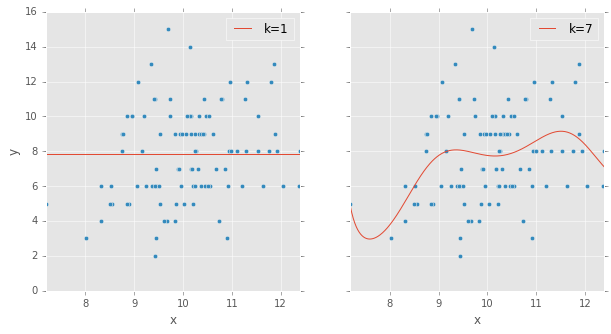

In [27]:
fig, axe = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
ax0 = axe[0]
d.plot.scatter(x="x", y="y", ax=ax0)
y, X = dmatrices('y ~ 1', data=d, return_type='dataframe')
fit = GLM(y, X, family=Poisson()).fit()
d['k=1'] = fit.predict(X)
d.sort_index(by='x').plot.line(x='x', y='k=1', ax=ax0)

## 
ax1 = axe[1]
d.plot.scatter(x="x", y="y", ax=ax1)
formula = 'y~'
for i in range(1, 7):
    formula += '+np.power(x,%d)' % i
y, X = dmatrices(formula, data=d, return_type='dataframe')
fit = GLM(y, X, family=Poisson()).fit()
dd = pd.DataFrame({'x': np.arange(d.x.min(), d.x.max(), 0.01)})
xx = dmatrix(formula[2:], data=dd, return_type='dataframe')
dd['k=7'] = fit.predict(xx)
dd.sort_index(by='x').plot.line(x='x', y='k=7', ax=ax1)

In [29]:
d = pd.read_csv('data3a.csv')
log_lik_full = sum(poisson.logpmf(d.y, d.y))

# Null model
y, X = dmatrices('y~1', data=d, return_type='dataframe')
fit_null = GLM(y, X, family=Poisson()).fit()
log_lik_null = fit_null.llf

(log_lik_full, log_lik_null)


(-192.8897525244958, -237.64322130928673)

In [36]:
# x model
y, X = dmatrices('y~x', data=d, return_type='dataframe')
fit_x = GLM(y, X, family=Poisson()).fit()
fit_x.llf

-235.38625076986079

In [37]:
# f model
y, X = dmatrices('y~f', data=d, return_type='dataframe')
fit_f = GLM(y, X, family=Poisson()).fit()
fit_f.llf

-237.62725696068685

In [38]:
y, X = dmatrices('y~x+f', data=d, return_type='dataframe')
fit_x_f = GLM(y, X, family=Poisson()).fit()
fit_x_f.llf

-235.29371924249369